<a href="https://colab.research.google.com/github/AAFREEN-SAYYED/ML-Practical-Solution/blob/gh-pages/ML_13_Practical(Long).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Dissecting the K-Means algorithm with a case study***

In [ ]:
# Imports
import matplotlib.pyplot as plt

from sklearn.datasets.samples_generator import make_blobs

# Generate 2D data points
X, _ = make_blobs(n_samples=10, centers=3, n_features=2,
                 cluster_std=0.2,  random_state=0)

# Convert the data points into a pandas DataFrame
import pandas as pd

# Generate indicators for the data points
obj_names = []
for i in range(1, 11):
    obj = "Object " + str(i)
    obj_names.append(obj)

# Create a pandas DataFrame with the names and (x, y) coordinates
data = pd.DataFrame({
    'Object': obj_names,
    'X_value': X[:, 0],
    'Y_value': X[:, -1]
})

# Preview the data
print(data.head())

     Object   X_value   Y_value
0  Object 1  1.005079  4.594642
1  Object 2  1.128478  4.328122
2  Object 3  2.117881  0.726845
3  Object 4  0.955626  4.385907
4  Object 5 -1.354017  2.769449


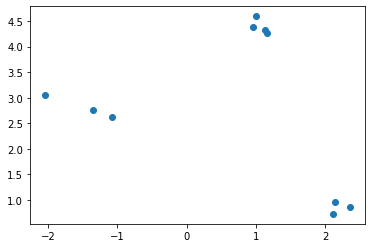

In [ ]:
plt.scatter(X[:, 0], X[:, -1])
plt.show()

We have a total of 10 data points with their x and y coordinates. We will give this data as the input to the K-Means algorithm. From the above scatter plot, it is clear that the data points can be grouped into 3 clusters (but a computer may have a very hard time figuring that out). So, we will ask the K-Means algorithm to cluster the data points into 3 clusters.



In [ ]:
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans
    
# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

We specified the number of desired clusters to be 3 (the value of K). After that, we gave the data points as the inputs to the K-Means model and trained the model. Let’s now extract the cluster centroids and the cluster labels from the K-Means variable.



In [ ]:
# Get the cluster centroids
print(kmeans.cluster_centers_)
    
# Get the cluster labels
print(kmeans.labels_)


[[ 1.06386762  4.39554682]
 [ 2.20533486  0.84929168]
 [-1.48815728  2.81502145]]
[0 0 1 0 2 2 2 1 1 0]


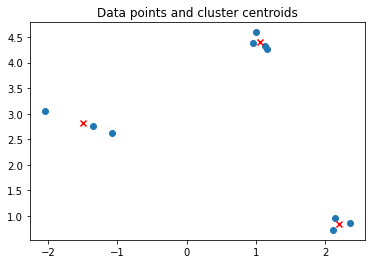

In [ ]:
# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(X[:, 0], X[:, -1])
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    
plt.title('Data points and cluster centroids')
plt.show()


The above figure is way more informative than the descriptive results shown above. We still have two extremely questions to answer:

How does one evaluate the performance of a clustering algorithm?

How to decide the ideal value of K in K-Means?

The questions complement each other. Let’s now find their answers.

**Evaluating a clustering algorithm and choosing ‘K’**

For this section, the clustering algorithm would be K-Means but the concepts can be applied to any clustering algorithm in general.

**Cluster evaluation: the silhouette score**

With scikit-learn, you can calculate the silhouette coefficients for all the data points very easily:

In [ ]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

print(silhouette_score(X, kmeans.labels_))

0.8810668519873337


**Using silhouette coefficients to determine K: The elbow method**

Let’s implement this in Python now. We will use the yellowbrick library for doing this:

We quickly trained three different K-Means models with 2, 3, 4 and 5 as the values of K.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


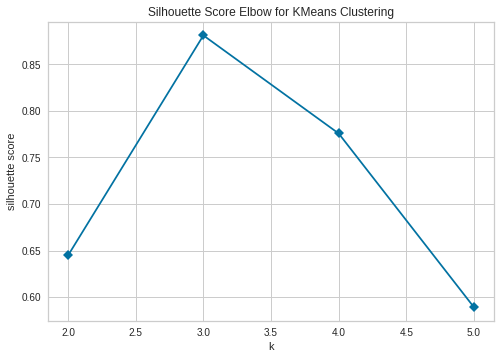

In [ ]:
# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(X)    
visualizer.poof()   


We can see that for K = 3, we get the highest average silhouette coefficient. The figure loosely resembles an elbow, hence the name of the method. 